# Multiclass Classification Using kernel Perceptron and SVM 

## First try SVM plotting with some simple points ##

In [1]:
from sklearn.svm import SVC
import numpy as np

clf = SVC(kernel='linear', C=100000)

# points
x=np.array([[1,2],
  [2,1],
  [2,3],
  [3,2],
  [4,5],
  [5,4],
  [5,6],
  [6,5]])
y = np.array([-1,-1,-1,-1,1,1,1,1])
clf.fit(x,y)


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Sketch

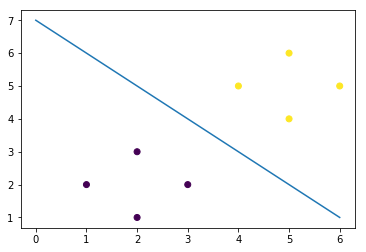

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
w = clf.coef_
b = clf.intercept_

plt.scatter(x[:, 0], x[:, 1], c=y)
lines = np.linspace(0,6, 100)
plt.plot(lines, -1*w[0][0]/w[0][1]*lines-b/w[0][1])
plt.show()

In [3]:
print(w)
print(b)

[[ 0.5  0.5]]
[-3.5]


# Multiclass Perceptron
Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

`data0.txt` has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

In [4]:
import pandas as pd

# read in data
df = pd.read_csv('data0.txt', header=None, delimiter=r"\s+")

df.head()

,0,1,2
0,1,1,0
1,1,2,0
2,1,3,0
3,2,1,0
4,2,2,0


In [5]:
# separate features and labels

x = df.iloc[:, 0:2].values
y = df.iloc[:,2].values

print(x.shape)
print(y.shape)
len(x)
print(x[0])

(48, 2)
(48,)
[1 1]


In [209]:
# classify the data
def classify(w,b,x):
    results = np.empty((x.shape[0], 0), dtype=np.float32)
    print("results shape: "+str(results.shape))
    for i in range(len(w)):
        # in each class
        w_i = w[i]
        b_i = b[i]
        result = np.dot(w_i, x.T)+b_i
        print("result shape: "+str(result[:,None].shape))
        results = np.hstack((results, result[:,None]))
    print("results shape: "+str(results.shape))
    return np.argmax(results, axis=1)

In [7]:
# multiclass perceptron 
def multi_pc(x, y, n_class):
    #initialize
    w = np.zeros((n_class, x.shape[1]))
    b = np.zeros(n_class)
    n_correct = 0
    # training
    while (n_correct < x.shape[0]):
        n_correct = 0
        for i in range(x.shape[0]):
            pred = classify(w,b,x[i])
            truth = y[i]
            if (pred != y[i]):
                # incorrect classification
                w[truth] = w[truth] + x[i]
                b[truth] = b[truth] + 1
                w[pred] = w[pred] - x[i]
                b[pred] = b[pred] - 1
            else:
                n_correct += 1
    return (w,b)

## Fit in the data

In [8]:
# fit in the data
w,b = multi_pc(x,y, 4)

print(w)
print(b)

[[  5.  -8.]
 [-46.  35.]
 [ 29. -34.]
 [ 12.   7.]]
[ 62. -16. -13. -33.]


## Plot the boundary using meshplot

results shape: (48400, 0)
result shape: (48400, 1)
result shape: (48400, 1)
result shape: (48400, 1)
result shape: (48400, 1)
results shape: (48400, 4)


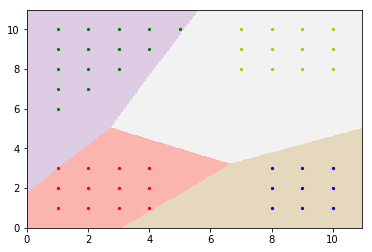

In [216]:
# Create mesh for plot
delta = 0.05
x1_min, x1_max = 0.0, 11.0
x2_min, x2_max = 0.0, 11.0
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))
Z = classify(w,b, np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=3)

# plot
# plot points
colors = ['r','g', 'b', 'y']
for label in range(0,4):
    plt.scatter(x[y==label, 0], x[y==label,1], c=colors[label], s=5)

# Multiclass kernel SVM
Multiclass kernel SVM. Use support vector machines to classify the MNIST data
set of handwritten digits.

In [10]:
# load MNIST Data
from struct import unpack
import gzip
from numpy import zeros, uint8, float32
# Function for parsing in dataset
def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)


In [11]:
# training set
training_set = get_labeled_data("../HW5/train-images-idx3-ubyte.gz", "../HW5/train-labels-idx1-ubyte.gz")
testing_set = get_labeled_data("../HW5/t10k-images-idx3-ubyte.gz", "../HW5/t10k-labels-idx1-ubyte.gz")

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


In [12]:
print(training_set[0].shape)
print(testing_set[0].shape)
# reshape
training_img = np.reshape(training_set[0], (60000, 784))
testing_img = np.reshape(testing_set[0], (10000, 784))
print(training_img.shape)
print(training_set[1].shape)
print(testing_img.shape)
print(testing_set[1].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [13]:
# fit in model
cc = [0.01, 0.1, 1.0, 10.0, 100.0]
from sklearn.svm import LinearSVC

for ccc in cc:
    clf = LinearSVC(loss='hinge', C=ccc)
    clf.fit(training_img, training_set[1])

    # print score
    print('C = '+str(cc))
    train_score = clf.score(training_img, training_set[1])
    print("Training accuracy: "+str(train_score))
    test_score = clf.score(testing_img, testing_set[1])
    print("Testing accuracy: "+ str(test_score))


/Users/rchenyb/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 0.831383333333
Testing accuracy: 0.8249
C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 0.870466666667
Testing accuracy: 0.8627
C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 0.848466666667
Testing accuracy: 0.8452
C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 0.864416666667
Testing accuracy: 0.8626
C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 0.889883333333
Testing accuracy: 0.8758


## Trying quadratic kernel

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=2, C=1.0)
clf.fit(training_img, training_set[1])

# print score
print('C = '+str(cc))
train_score = clf.score(training_img, training_set[1])
print("Training accuracy: "+str(train_score))
test_score = clf.score(testing_img, testing_set[1])
print("Testing accuracy: "+ str(test_score))
print("Number of support vectors: "+str(clf.n_support_))

/Users/rchenyb/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C = [0.01, 0.1, 1.0, 10.0, 100.0]
Training accuracy: 1.0
Testing accuracy: 0.9806
Number of support vectors: [ 476  423  984  989  876 1060  641  882 1186 1135]


# Kernel Perceptron
Kernel Perceptron. Implement the kernel Perceptron algorithm, with the quadratic and RBF kernels.

The data sets `data1.txt` and `data2.txt` contain 2-d data with two classes (coded as −1 and 1).
Each row has three numbers: the two coordinates of the data points and the label.

## kernel perceptron with quadratic funciton

In [15]:
# read in data
df1 = pd.read_csv('data1.txt', header=None, delimiter=r"\s+")
df2 = pd.read_csv('data2.txt', header=None, delimiter=r"\s+")
print(df1.head())
print(df2.head())

   0  1  2
0  1  1  1
1  2  1  1
2  3  1  1
3  4  1  1
4  5  1  1
   0  1  2
0  1  1  1
1  1  2  1
2  1  3  1
3  1  4  1
4  1  5  1


In [48]:
# separate the values
x1 = df1.iloc[:, 0:2].values
y1 = df1.iloc[:,2].values

x2 = df2.iloc[:, 0:2].values
y2 = df2.iloc[:,2].values

print(x1.shape)
print(x2.shape)
print(y1.shape)

(76, 2)
(60, 2)
(76,)


In [57]:
# classify binary classification with quadratic kernel
def bi_class(a, x, y, x_i, b):
    sum = 0
    for j in range(len(a)):
        temp = a[j]*y[j]*np.power((np.matmul(x[j], x_i.T)+1),2)
        sum += temp
    result = sum + b
    return np.sign(result)


In [72]:
# kernel perceptron
def k_pc(x,y):
    n_correct = 0
    n_size= x.shape[0]
    a = np.zeros(n_size)
    b = 0
    while (n_correct < n_size):
        n_correct = 0
        for i in range(n_size):
            calc = y[i]*bi_class(a,x,y,x[i], b)
            if (calc <= 0):
                a[i] += 1
                b += y[i]
            else:
                n_correct += 1
    return (a,b)

In [51]:
# fai(x)
def fai(x):
    x1 = x[0]
    x2 = x[1]
    result = np.array([x1,x2,x1*x1, x2*x2, x1*x2])
    return result
    
# get w
def get_w(a,b,x,y):
    sum = 0
    for i in range(len(a)):
        temp = a[i]*y[i]*fai(x[i])
        sum += temp
    return sum


In [52]:
a1,b1 = k_pc(x1,y1)
w1 = get_w(a1,b1,x1,y1)
print(w1)

[ 56.  49.  22.  25. -49.]


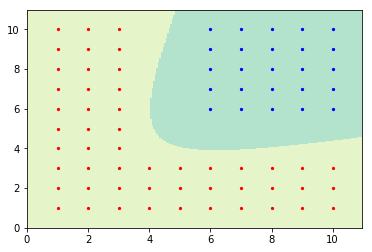

In [61]:
# Create mesh for plot
delta = 0.05
x1_min, x1_max = 0.0, 11.0
x2_min, x2_max = 0.0, 11.0
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))
Z = bi_class(a1, x1, y1, np.c_[xx1.ravel(), xx2.ravel()], b1)
Z = Z.reshape(xx1.shape)
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)

# plot the training points
cols = ['red', 'blue']
plt.scatter(x1[y1==1,0], x1[y1==1,1], c=cols[0], s=5)
plt.scatter(x1[y1==-1,0], x1[y1==-1,1], c=cols[1], s=5)

plt.show()

## Do the same for data2

In [62]:
a2,b2 = k_pc(x2,y2)
w2 = get_w(a2,b2,x2,y2)
print(w2)

[-2267.   373.   567.   -25.   -48.]


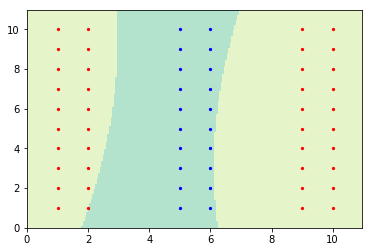

In [71]:
def mesh_plot(a1,b1,x1,y1):
    # Create mesh for plot
    delta = 0.05
    x1_min, x1_max = 0.0, 11.0
    x2_min, x2_max = 0.0, 11.0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))
    Z = bi_class(a1, x1, y1, np.c_[xx1.ravel(), xx2.ravel()], b1)
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)

    # plot the training points
    cols = ['red', 'blue']
    plt.scatter(x1[y1==1,0], x1[y1==1,1], c=cols[0], s=5)
    plt.scatter(x1[y1==-1,0], x1[y1==-1,1], c=cols[1], s=5)

    plt.show()
    
mesh_plot(a2,b2,x2,y2)

# Kernel Perceptron with RBF Kernel

In [128]:
# classify binary classification with quadratic kernel
def bi_class_rbf(a, x, y, x_i, b, sigma):
    sum = 0
    for j in range(len(a)):
        temp = a[j]*y[j]*np.exp(-1*np.power(np.linalg.norm(np.array(x[j]-x_i), axis=1),2)/2*np.power(sigma, 2))
        sum += temp
    result = sum + b
    return np.sign(result)

In [112]:
# kernel perceptron
def k_pc_rbf(x,y):
    n_correct = 0
    n_size= x.shape[0]
    a = np.zeros(n_size)
    b = 0
    while (n_correct < n_size):
        n_correct = 0
        for i in range(n_size):
            calc = y[i]*bi_class_rbf(a,x,y,x[i], b, sigma)
            if (calc <= 0):
                a[i] += 1
                b += y[i]
            else:
                n_correct += 1
    return (a,b)

In [122]:
sigma = 10.0
a3,b3 = k_pc_rbf(x1,y1)
w3 = get_w(a3,b3,x1,y1)
print(w3)

[ -32.  -41. -290. -375. -375.]


In [87]:
def mesh_plot_rbf(a1,b1,x1,y1):
    # Create mesh for plot
    delta = 0.05
    x1_min, x1_max = 0.0, 11.0
    x2_min, x2_max = 0.0, 11.0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, delta), np.arange(x2_min, x2_max, delta))
    Z = bi_class_rbf(a1, x1, y1, np.c_[xx1.ravel(), xx2.ravel()], b1,sigma)
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel2, vmin=0, vmax=2)

    # plot the training points
    cols = ['red', 'blue']
    plt.scatter(x1[y1==1,0], x1[y1==1,1], c=cols[0], s=5)
    plt.scatter(x1[y1==-1,0], x1[y1==-1,1], c=cols[1], s=5)

    plt.show()

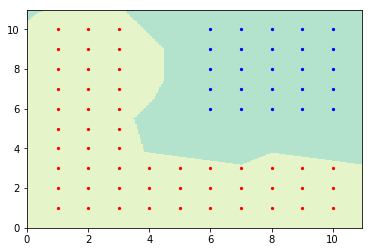

In [125]:
mesh_plot_rbf(a3,b3,x1,y1)

## With data 2

In [127]:
a4,b4 = k_pc_rbf(x2,y2)
w4 = get_w(a4,b4,x2,y2)
print(w4)

[   4.    8.  152.   90.   44.]


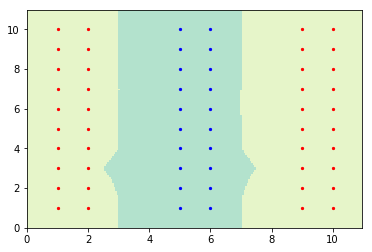

In [129]:
mesh_plot_rbf(a4,b4,x2,y2)